Author: Gustav Nilsson Pedersen - s174562@student.dtu.dk

In [1]:
import pandas as pd


from sklearn.model_selection import  RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt


import joblib

### Read data set with UQS and CQMs

In [ ]:
full_dataset_df = pd.read_csv('VGGFace2-200k-all.csv', sep=';')
train_set_df = pd.read_csv('VGGFace200k-random-state-36-train_set-only-filenames.csv', sep=';')
test_set_df = pd.read_csv('VGGFace200k-random-state-36-test_set-only-filenames.csv', sep=';')


C:\Users\admin\AppData\Local\Temp\ipykernel_14264\3394963219.py:1: DtypeWarning: Columns (15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  full_dataset_df = pd.read_csv('C:\\Users\\admin\\Desktop\\VGGFace2-200k-all.csv', sep=';')


### Inspect data

In [3]:
full_dataset_df.describe()

,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,CompressionArtifacts,...,LeftwardCropOfTheFaceImage.scalar,RightwardCropOfTheFaceImage.scalar,MarginAboveOfTheFaceImage.scalar,MarginBelowOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57
count,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,195788.000000,195788.000000,197684.000000,197684.000000,197684.000000,...,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,0.0
mean,21.231196,80.664214,0.411592,0.262675,0.022222,0.211277,0.000570,6.779410,39.379429,0.838543,...,99.949283,99.952181,49.640062,47.061239,86.040292,95.182974,95.729143,46.441513,91.646405,NaN
std,3.933268,74.322003,0.218670,0.116430,0.016821,0.209541,0.008520,0.629621,18.780816,0.076957,...,2.101427,2.008245,33.027875,23.085901,20.928868,10.167331,10.403484,28.569081,24.834834,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,18.226044,28.511613,0.242798,0.176984,0.010652,0.059145,0.000000,6.488656,42.000000,0.795383,...,100.000000,100.000000,16.000000,31.000000,82.000000,95.000000,96.000000,19.000000,100.000000,NaN
50%,21.227950,61.484994,0.427597,0.252320,0.018125,0.133240,0.000000,6.900752,47.000000,0.858716,...,100.000000,100.000000,55.000000,49.000000,96.000000,98.000000,99.000000,41.000000,100.000000,NaN
75%,24.228010,110.766834,0.590830,0.336969,0.028969,0.296119,0.000000,7.209606,47.000000,0.895513,...,100.000000,100.000000,80.000000,64.000000,99.000000,100.000000,100.000000,72.000000,100.000000,NaN
max,35.189240,2056.000000,1.000000,0.868540,0.189381,1.000000,0.660669,7.960028,50.000000,0.997724,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,NaN


In [4]:
full_dataset_df["UnifiedQualityScore.scalar"].describe()

count    197684.000000
mean         38.536331
std          26.999586
min          -1.000000
25%          14.000000
50%          34.000000
75%          62.000000
max          99.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [5]:
full_dataset_df.dtypes

Filename                               object
UnifiedQualityScore                   float64
BackgroundUniformity                  float64
IlluminationUniformity                float64
LuminanceMean                         float64
LuminanceVariance                     float64
UnderExposurePrevention               float64
OverExposurePrevention                float64
DynamicRange                          float64
Sharpness                               int64
CompressionArtifacts                  float64
NaturalColour                         float64
SingleFacePresent                     float64
EyesOpen                              float64
MouthClosed                           float64
EyesVisible                            object
MouthOcclusionPrevention              float64
FaceOcclusionPrevention               float64
InterEyeDistance                      float64
HeadSize                              float64
LeftwardCropOfTheFaceImage            float64
RightwardCropOfTheFaceImage       

In [6]:
full_dataset_df["EyesVisible.scalar"].describe()

count     197684
unique       143
top          100
freq      134691
Name: EyesVisible.scalar, dtype: object

In [7]:
non_float_cells = full_dataset_df[full_dataset_df['EyesVisible'].apply(lambda x: x == '-nan(ind)')]

print(non_float_cells["EyesVisible"])

def convert_nanind_to_0(value):
    if value == '-nan(ind)':
        return 0
    else:
        return value

# Set EyesVisible.scalar score to the lowest value of 0
full_dataset_df['EyesVisible.scalar'] = full_dataset_df['EyesVisible.scalar'].apply(lambda x: convert_nanind_to_0(x))
full_dataset_df['EyesVisible.scalar'] = full_dataset_df['EyesVisible.scalar'].astype(int)



813       -nan(ind)
5943      -nan(ind)
6210      -nan(ind)
6293      -nan(ind)
8913      -nan(ind)
            ...    
192979    -nan(ind)
193426    -nan(ind)
193610    -nan(ind)
193715    -nan(ind)
194407    -nan(ind)
Name: EyesVisible, Length: 167, dtype: object


In [8]:
# test_missing

In [9]:
# What is z-score exactly again?
#stats.zscore(train_df['MarginBelowOfTheFaceImage']).sort_values().tail(10)

In [10]:
pd.DataFrame(full_dataset_df.isnull().sum().sort_values(ascending=False))

,0
Unnamed: 57,197684
UnderExposurePrevention,1896
OverExposurePrevention,1896
InterEyeDistance,167
BackgroundUniformity,0
UnifiedQualityScore,0
LuminanceVariance,0
LuminanceMean,0
DynamicRange,0
Filename,0


In [11]:
# print(train_df['EyesVisible.scalar'].unique())
# train_df['EyesVisible.scalar'] = train_df['EyesVisible.scalar'].astype(str).astype(int)

# print(train_df['EyesVisible.scalar'].unique())
# Unique can help identify nan values 
#UnderExposurePrevention.scalar does not have nan but has -1. Maybe same with OverExposurePrevention, check.
# Use .fillna to fill nan values

## Remove native measures and scores

In [12]:
# Save dataframe with filenames before dropping columns
test_set_filenames_df = pd.DataFrame(data=test_set_df["Filename"])




In [13]:
# Predict scalar UQS based on scalar CQMs
columns_to_drop = ['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
       'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
       'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
       'Sharpness', 'CompressionArtifacts', 'NaturalColour',
       'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
       'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
       'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
       'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
       'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
       'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57']


# Also drop CQMs that are not in landmarked region
# columns_to_drop.append(['BackgroundUniformity.scalar', 'SingleFacePresent.scalar',
#        'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar',  'NoHeadCoverings.scalar'])


In the box below, define which CQMs should be removed (for ablation)

In [14]:
ablation_name = "All"
ablation_columns_to_drop = []


# ablation_name = "Top-24"
# ablation_columns_to_drop = [
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]



# ablation_name = "Top-20"
# ablation_columns_to_drop = [
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar',
# ]




# ablation_name = "Top-15"
# ablation_columns_to_drop = [
#     'MouthClosed.scalar',
#     'OverExposurePrevention.scalar',
#     'NaturalColour.scalar',
#     'MarginBelowOfTheFaceImage.scalar',
#     'Sharpness.scalar',
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]



# ablation_name = "Top-10"
# ablation_columns_to_drop = [
#     'IlluminationUniformity.scalar',
#     'UnderExposurePrevention.scalar',
#     'NoHeadCoverings.scalar',
#     'LuminanceVariance.scalar',
#     'SingleFacePresent.scalar',
#     'MouthClosed.scalar',
#     'OverExposurePrevention.scalar',
#     'NaturalColour.scalar',
#     'MarginBelowOfTheFaceImage.scalar',
#     'Sharpness.scalar',
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]








columns_to_drop = columns_to_drop + ablation_columns_to_drop


# === CQMs ordered by pAUC from lowest to highest ===

# 'FaceOcclusionPrevention.scalar',
# 'EyesVisible.scalar',
# 'HeadPoseYaw.scalar',
# 'MouthOcclusionPrevention.scalar',
# 'HeadPosePitch.scalar',
# 'EyesOpen.scalar',
# 'HeadPoseRoll.scalar',
# 'InterEyeDistance.scalar',
# 'DynamicRange.scalar',
# 'LuminanceMean.scalar',
# 'IlluminationUniformity.scalar',
# 'UnderExposurePrevention.scalar',
# 'NoHeadCoverings.scalar',
# 'LuminanceVariance.scalar',
# 'SingleFacePresent.scalar',
# 'MouthClosed.scalar',
# 'OverExposurePrevention.scalar',
# 'NaturalColour.scalar',
# 'MarginBelowOfTheFaceImage.scalar',
# 'Sharpness.scalar',
# 'HeadSize.scalar',
# 'CompressionArtifacts.scalar',
# 'RightwardCropOfTheFaceImage.scalar',
# 'LeftwardCropOfTheFaceImage.scalar',
# 'MarginAboveOfTheFaceImage.scalar',
# 'BackgroundUniformity.scalar',
# 'ExpressionNeutrality.scalar'


In [15]:
print(columns_to_drop)
full_dataset_df = full_dataset_df.drop(columns=columns_to_drop)
train_set_df = train_set_df.drop(columns=columns_to_drop)
test_set_df = test_set_df.drop(columns=columns_to_drop)


['Filename', 'UnifiedQualityScore', 'BackgroundUniformity', 'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance', 'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange', 'Sharpness', 'CompressionArtifacts', 'NaturalColour', 'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible', 'MouthOcclusionPrevention', 'FaceOcclusionPrevention', 'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch', 'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57']


## Feature engineering

Various things have been tried. None of them seem to improve performance.

In [16]:
# train_df['MeanCropScore'] = (train_df['LeftwardCropOfTheFaceImage'] + train_df['RightwardCropOfTheFaceImage']) / 2
# train_df['MeanCropScore.scalar'] = (train_df['LeftwardCropOfTheFaceImage.scalar'] + train_df['RightwardCropOfTheFaceImage.scalar']) / 2

In [17]:
# train_df['MeanCropScore'].head(15)
# train_df['MeanCropScore.scalar'].head(15)

In [18]:
# train_df['MeanMarginScore'] = (train_df['MarginBelowOfTheFaceImage'] + train_df['MarginAboveOfTheFaceImage']) / 2
# train_df['MeanMarginScore.scalar'] = (train_df['MarginBelowOfTheFaceImage.scalar'] + train_df['MarginAboveOfTheFaceImage.scalar']) / 2


In [19]:
# train_df['MeanMarginScore'].head(15)
# train_df['MeanMarginScore.scalar'].head(15)

## Check correlations and drop some correlated features

In [20]:
# correlations = full_dataset_df.corr()
# plt.figure(figsize=(19,10))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

In [21]:
# FaceOcclusionPrevention or EyesVisible and MouthOcclusionPrevention?
# Remove ExpressionNeutrality or the ones it correlates with?
# train_df = train_df.drop(columns=['DynamicRange', 'HeadSize',
#                                   'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 
#                                   'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage'])
# train_df = train_df.drop(columns=['DynamicRange.scalar', 'HeadSize.scalar',
#                                   'LeftwardCropOfTheFaceImage.scalar', 'RightwardCropOfTheFaceImage.scalar', 
#                                   'MarginAboveOfTheFaceImage.scalar', 'MarginBelowOfTheFaceImage.scalar'])

In [22]:
# corr_after_drop = full_dataset_df.corr()
# plt.figure(figsize=(19,10))
# sns.heatmap(corr_after_drop, annot=True, cmap='coolwarm', fmt=".2f")

## UQS histogram

<Axes: xlabel='UnifiedQualityScore.scalar', ylabel='Count'>

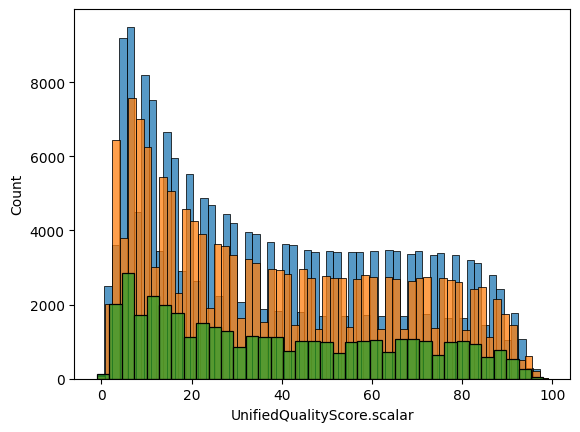

In [23]:
sns.histplot(
    full_dataset_df,
    x=full_dataset_df['UnifiedQualityScore.scalar']
)

sns.histplot(
    train_set_df,
    x=train_set_df['UnifiedQualityScore.scalar']
)


sns.histplot(
    test_set_df,
    x=test_set_df['UnifiedQualityScore.scalar']
)

In [24]:
column_names = full_dataset_df.select_dtypes(include=['int64', 'float64']).columns

column_names = column_names.drop('UnifiedQualityScore.scalar')

In [25]:
# Impute to fill missing values. Might not be necessary...
impute_and_scale_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [26]:
columns_transformed = ColumnTransformer(transformers=[
    ('num_p', impute_and_scale_pipeline, column_names)
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [27]:
preprocess_pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformed)
])

In [28]:


X_train_not_preprocessed = train_set_df.drop('UnifiedQualityScore.scalar', axis=1)
y_train = train_set_df['UnifiedQualityScore.scalar']
X_test_not_preprocessed = test_set_df.drop('UnifiedQualityScore.scalar', axis=1)
y_test = test_set_df['UnifiedQualityScore.scalar']



In [29]:
X_train = preprocess_pipeline.fit_transform(X_train_not_preprocessed)
X_test = preprocess_pipeline.fit_transform(X_test_not_preprocessed)


In [30]:
random_forest_regressor = RandomForestRegressor(random_state=36)

In [31]:
# Create grid for RandomSearchCV

# For running multiple randomized search grids. So some can be very specific with only one possible set of parameters, and the model for that option will be saved,
# and the predicted UQS using that model will be saved
randomized_search_grids_dictionary = {} # Structure: Level 1 - Name of randomized search grid,    Level 2 - randomized search grid


# See randomized-search-settings-RFR.txt for more settings used

# === SPECIFIC FINAL 4 ===
# Results:
n_estimators = [200] 
max_depth = [30]
max_features = ["sqrt"]
min_samples_leaf = [2]
min_samples_split = [4]
bootstrap = [False]

randomized_search_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
randomized_search_grids_dictionary["SPECIFIC_FINAL_4"] = randomized_search_grid






In [32]:
randomized_search_grids_dictionary

{'SPECIFIC_FINAL_4': {'n_estimators': [200],
  'max_depth': [30],
  'max_features': ['sqrt'],
  'min_samples_leaf': [2],
  'min_samples_split': [4],
  'bootstrap': [False]}}

In [33]:
def search_grid_and_save_model_and_results(randomized_search_grid, random_forest_regressor, X_train, y_train, cv_folds, model_name, ablation_name): 
    random_forest_cross_val = RandomizedSearchCV(estimator = random_forest_regressor, 
                                             param_distributions = randomized_search_grid,
                                             n_iter = 30,
                                             cv = cv_folds,
                                             verbose=3,
                                             random_state=36,
                                             n_jobs = -1)
    
    random_forest_cross_val.fit(X_train, y_train)
    
    results_of_randomized_search_cv = pd.DataFrame(random_forest_cross_val.cv_results_)
    results_of_randomized_search_cv.to_csv(f"./results_of_RandomizedSearchCVs/results_of_randomized_search_cv-RFR-{model_name}-{ablation_name}.csv", sep=';')

    model_filepath = f"./models/RFR_UQS_scalar_to_scalar_{model_name}-{ablation_name}_VGGFace-200k.pkl"
    joblib.dump(random_forest_cross_val, model_filepath)

    return random_forest_cross_val

    

In [34]:
def predict_UQS_and_save(model, X_test_set, model_name, filenames_df, ablation_name):
    y_predicted = model.predict(X_test_set)
    y_predicted_df = pd.DataFrame(y_predicted)
    y_predicted_df.columns = ["UQS"]
    y_predicted_df["UQS"] = y_predicted_df["UQS"].apply(lambda x: round(x))
    print(len(y_predicted_df))
    filename_and_predicted_UQS_Test_set = pd.concat([filenames_df, y_predicted_df], axis=1, join = 'outer', ignore_index=False, sort=False)
    print(filename_and_predicted_UQS_Test_set)
    filename_and_predicted_UQS_Test_set[["Filename", "UQS"]].to_csv(f'./predicted_UQS_files/Predicted-UQS-RFR-{model_name}-{ablation_name}-Test_set-VGGFace200k.csv', index=False, sep=';')

In [35]:
def evaluate_model(model, X_test, y_test, model_name, ablation_name):
    score = model.score(X_test, y_test)
    score_df = pd.DataFrame(data=[score])
    score_df.columns = ["R2Score"]
    score_df.to_csv(f"RFR-evaluations/RFR-evaluation-{model_name}-{ablation_name}.csv", sep=';', index=False)
    

In [36]:
def plot_feature_importance(feature_importances_df, filepath_png, setting_name, ablation_name, threshold = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.subplots_adjust(bottom=0.4) # get labels to not be cut off
    ax.bar(feature_importances_df["feature"], feature_importances_df["feature_importance"])
    plt.xticks(rotation=45, ha='right')
    ax.set_ylabel('Feature importance')
    ax.set_title(f'Feature importances for RFR-{setting_name}-{ablation_name}')
    plt.savefig(filepath_png)
    plt.clf()


    


In [37]:
def save_feature_importances(model, feature_names, setting_name, ablation_name):
    feature_importances_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_, 'feature': feature_names})
    feature_importances_df = feature_importances_df.sort_values('feature_importance', ascending = False)
    filepath_csv = f"feature_importances/RFR-{ablation_name}/RFR-feature-importances-{setting_name}-{ablation_name}.csv"
    filepath_png = filepath_csv.replace("csv", "png")
    feature_importances_df.to_csv(filepath_csv, sep=';', index=False)
    plot_feature_importance(feature_importances_df, filepath_png, setting_name, ablation_name)
    

In [38]:
for setting_name, rs_grid in randomized_search_grids_dictionary.items():
    search_result = search_grid_and_save_model_and_results(rs_grid, random_forest_regressor, X_train, y_train, 5, setting_name, ablation_name)
    evaluate_model(search_result.best_estimator_, X_test, y_test, setting_name, ablation_name)
    predict_UQS_and_save(search_result.best_estimator_, X_test, setting_name, test_set_filenames_df, ablation_name)
    save_feature_importances(search_result.best_estimator_, full_dataset_df.drop(columns=['UnifiedQualityScore.scalar']).columns, setting_name, ablation_name)
    



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
39504
                  Filename  UQS
0      n000150-0003_01.jpg   55
1      n000150-0012_01.jpg   63
2      n000150-0015_01.jpg   20
3      n000150-0020_01.jpg   71
4      n000150-0023_02.jpg   25
...                    ...  ...
39499  n001296-0289_01.jpg   21
39500  n001296-0296_01.jpg   56
39501  n001296-0301_01.jpg   31
39502  n001296-0303_01.jpg   32
39503  n001296-0313_01.jpg   19

[39504 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>